# Project:  Data  Wrangling of WeRateDogs Twitter archive

## Table of contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gather">Gathering Data</a></li>
    <li><a href="#access">Accessing Data</a></li>
    <li><a href="#clean">Cleaning Data</a></li>
    <li><a href="#analyse">Analyzing and Visualizing Data</a></li>
    <li><a href="#store">Storing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
import json
from timeit import default_timer as timer


<a id='gather'></a>
## Gathering Data

### Getting the tweet image predictions data

In [2]:
#getting the url
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#writing the content to a file 
with open('image_predicted.tsv','wb') as file:
    file.write(response.content)

In [3]:
# reading the tsv file to a dataframe
image_predictions = pd.read_csv('image_predicted.tsv',delimiter='\t')

In [4]:
#getting the first five observations
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Getting WeRateDogs Twitter archive data

In [5]:
# reading csv file to a dataframe
twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")

#getting the first five observations
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Getting additional data containing retweet and like count

In [10]:
#getting data from Twitter API using tweepy
import tweepy

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)




In [11]:
# generating the data from the APi
count = 0
failed_dict = {}
start = timer()

with open('tweet_json.txt','w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(str(count) + ":" + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,tweet_mode="extended")
            print('Success')
            json.dump(tweet._json,file)
            file.write('\n')
        except tweepy.TweepyException as e:
            print('Failed')
            failed_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(failed_dict)
            

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Failed
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:88598480001994752

Success
270:841320156043304961
Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Failed
298:837110210464448512
Success
299:837012587749474308
Failed
300:836989968035819520
Success
301:836753516572119041
Success
30

Success
535:807106840509214720
Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success


Success
800:772826264096874500
Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Failed
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Failed
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
83

Rate limit reached. Sleeping for: 293


Success
902:758474966123810816
Success
903:758467244762497024
Success
904:758405701903519748
Success
905:758355060040593408
Success
906:758099635764359168
Success
907:758041019896193024
Success
908:757741869644341248
Success
909:757729163776290825
Success
910:757725642876129280
Success
911:757611664640446465
Success
912:757597904299253760
Success
913:757596066325864448
Success
914:757400162377592832
Success
915:757393109802180609
Success
916:757354760399941633
Success
917:756998049151549440
Success
918:756939218950160384
Success
919:756651752796094464
Success
920:756526248105566208
Success
921:756303284449767430
Success
922:756288534030475264
Success
923:756275833623502848
Success
924:755955933503782912
Success
925:755206590534418437
Success
926:755110668769038337
Success
927:754874841593970688
Success
928:754856583969079297
Success
929:754747087846248448
Success
930:754482103782404096
Success
931:754449512966619136
Success
932:754120377874386944
Success
933:754011816964026368
Failed
9

Success
1162:723912936180330496
Success
1163:723688335806480385
Success
1164:723673163800948736
Success
1165:723179728551723008
Success
1166:722974582966214656
Success
1167:722613351520608256
Success
1168:721503162398597120
Success
1169:721001180231503872
Success
1170:720785406564900865
Success
1171:720775346191278080
Success
1172:720415127506415616
Success
1173:720389942216527872
Success
1174:720340705894408192
Success
1175:720059472081784833
Success
1176:720043174954147842
Success
1177:719991154352222208
Success
1178:719704490224398336
Success
1179:719551379208073216
Success
1180:719367763014393856
Success
1181:719339463458033665
Success
1182:719332531645071360
Success
1183:718971898235854848
Success
1184:718939241951195136
Success
1185:718631497683582976
Success
1186:718613305783398402
Success
1187:718540630683709445
Success
1188:718460005985447936
Success
1189:718454725339934721
Success
1190:718246886998687744
Success
1191:718234618122661888
Success
1192:717841801130979328
Success


Success
1419:698355670425473025
Success
1420:698342080612007937
Success
1421:698262614669991936
Success
1422:698195409219559425
Success
1423:698178924120031232
Success
1424:697995514407682048
Success
1425:697990423684476929
Success
1426:697943111201378304
Success
1427:697881462549430272
Success
1428:697630435728322560
Success
1429:697616773278015490
Success
1430:697596423848730625
Success
1431:697575480820686848
Success
1432:697516214579523584
Success
1433:697482927769255936
Success
1434:697463031882764288
Success
1435:697270446429966336
Success
1436:697259378236399616
Success
1437:697255105972801536
Success
1438:697242256848379904
Success
1439:696900204696625153
Success
1440:696894894812565505
Success
1441:696886256886657024
Success
1442:696877980375769088
Success
1443:696754882863349760
Success
1444:696744641916489729
Success
1445:696713835009417216
Success
1446:696518437233913856
Success
1447:696490539101908992
Success
1448:696488710901260288
Success
1449:696405997980676096
Success


Success
1676:682242692827447297
Success
1677:682088079302213632
Success
1678:682059653698686977
Success
1679:682047327939461121
Success
1680:682032003584274432
Success
1681:682003177596559360
Success
1682:681981167097122816
Success
1683:681891461017812993
Success
1684:681694085539872773
Success
1685:681679526984871937
Success
1686:681654059175129088
Success
1687:681610798867845120
Success
1688:681579835668455424
Success
1689:681523177663676416
Success
1690:681340665377193984
Success
1691:681339448655802368
Success
1692:681320187870711809
Success
1693:681302363064414209
Success
1694:681297372102656000
Success
1695:681281657291280384
Success
1696:681261549936340994
Success
1697:681242418453299201
Success
1698:681231109724700672
Success
1699:681193455364796417
Success
1700:680970795137544192
Success
1701:680959110691590145
Success
1702:680940246314430465
Success
1703:680934982542561280
Success
1704:680913438424612864
Success
1705:680889648562991104
Success
1706:680836378243002368
Success


Rate limit reached. Sleeping for: 310


Success
1802:676957860086095872
Success
1803:676949632774234114
Success
1804:676948236477857792
Success
1805:676946864479084545
Success
1806:676942428000112642
Success
1807:676936541936185344
Success
1808:676916996760600576
Success
1809:676897532954456065
Success
1810:676864501615042560
Success
1811:676821958043033607
Success
1812:676819651066732545
Success
1813:676811746707918848
Success
1814:676776431406465024
Success
1815:676617503762681856
Success
1816:676613908052996102
Success
1817:676606785097199616
Success
1818:676603393314578432
Success
1819:676593408224403456
Success
1820:676590572941893632
Success
1821:676588346097852417
Success
1822:676582956622721024
Success
1823:676575501977128964
Success
1824:676533798876651520
Success
1825:676496375194980353
Success
1826:676470639084101634
Success
1827:676440007570247681
Success
1828:676430933382295552
Success
1829:676263575653122048
Success
1830:676237365392908289
Success
1831:676219687039057920
Success
1832:676215927814406144
Success


Success
2059:671347597085433856
Success
2060:671186162933985280
Success
2061:671182547775299584
Success
2062:671166507850801152
Success
2063:671163268581498880
Success
2064:671159727754231808
Success
2065:671154572044468225
Success
2066:671151324042559489
Success
2067:671147085991960577
Success
2068:671141549288370177
Success
2069:671138694582165504
Success
2070:671134062904504320
Success
2071:671122204919246848
Success
2072:671115716440031232
Success
2073:671109016219725825
Success
2074:670995969505435648
Success
2075:670842764863651840
Success
2076:670840546554966016
Success
2077:670838202509447168
Success
2078:670833812859932673
Success
2079:670832455012716544
Success
2080:670826280409919488
Success
2081:670823764196741120
Success
2082:670822709593571328
Success
2083:670815497391357952
Success
2084:670811965569282048
Success
2085:670807719151067136
Success
2086:670804601705242624
Success
2087:670803562457407488
Success
2088:670797304698376195
Success
2089:670792680469889025
Success


Success
2316:666691418707132416
Success
2317:666649482315059201
Success
2318:666644823164719104
Success
2319:666454714377183233
Success
2320:666447344410484738
Success
2321:666437273139982337
Success
2322:666435652385423360
Success
2323:666430724426358785
Success
2324:666428276349472768
Success
2325:666421158376562688
Success
2326:666418789513326592
Success
2327:666411507551481857
Success
2328:666407126856765440
Success
2329:666396247373291520
Success
2330:666373753744588802
Success
2331:666362758909284353
Success
2332:666353288456101888
Success
2333:666345417576210432
Success
2334:666337882303524864
Success
2335:666293911632134144
Success
2336:666287406224695296
Success
2337:666273097616637952
Success
2338:666268910803644416
Success
2339:666104133288665088
Success
2340:666102155909144576
Success
2341:666099513787052032
Success
2342:666094000022159362
Success
2343:666082916733198337
Success
2344:666073100786774016
Success
2345:666071193221509120
Success
2346:666063827256086533
Success


In [12]:
#reading the data
tweet_data = []
with open('tweet_json.txt','r') as file:
    tweet_content = file.readlines()
    for i in range(len(tweet_content)):
        tweet = []
        tweet.append(json.loads(tweet_content[i])['id'])
        tweet.append(json.loads(tweet_content[i])['retweet_count'])
        tweet.append(json.loads(tweet_content[i])['favorite_count'])
        tweet_data.append(tweet)
        
   

In [13]:
#reading the data to a dataframe
headers = ['tweet_id','retweet_count','favorite_count']
tweet_data_df = pd.DataFrame(tweet_data,columns=headers)
tweet_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33810
1,892177421306343426,5301,29330
2,891815181378084864,3481,22049
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311


<a id='access'></a>
## Accessing Data

In [14]:
#getting  summary of the data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# getting statistical summary of the data
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# getting the sum of all duplicates values
image_predictions['tweet_id'].duplicated().sum()

0

In [17]:
#getting  summary of the data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# getting the sum of a duplicates values
twitter_archive.duplicated().sum()

0

In [19]:
#accesing all unique values in in_reply_to_status_id column
twitter_archive['in_reply_to_status_id'].unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [20]:
#accessing null values in expanded_urls column
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
#getting smaples of the data
twitter_archive['expanded_urls'].sample(5)


606     https://twitter.com/dog_rates/status/771770456...
1284    https://twitter.com/dog_rates/status/708479650...
2061    https://twitter.com/dog_rates/status/671166507...
2332    https://twitter.com/dog_rates/status/666345417...
2330    https://twitter.com/dog_rates/status/666362758...
Name: expanded_urls, dtype: object

In [22]:
# accessing unique values in rating_numerator column
twitter_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [23]:
# getting count of each unique value in rating_numerator column
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
#accessing unique values in rating_denominator
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [25]:
# getting count of each unique value in rating_denominator column
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
#accessing unique values in source
twitter_archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [27]:
#getting summary of the data
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [28]:
#checking for duplicate values in tweet_id
tweet_data_df[tweet_data_df['tweet_id'].duplicated()]

,tweet_id,retweet_count,favorite_count


In [29]:
#getting statistical summary
tweet_data_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.022346,7054.237645
std,6.820795e+16,4184.823270,10962.352114
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.500000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8604.500000
max,8.924206e+17,70732.000000,144883.000000


### Quality

**image_predictions**
1. tweet_id is of integer data type and not object
2. p1,p2 and p3 represeting breed of dogs classification contains underscores 

**twitter_archive table**

3. missing values in_reply_to_status_id and in_reply_to_user_id(contains just 78 observations indicating 96.69% missing values)
4. retweets are also part of the data as there are observations with retweeted_status_id but only tweets data are needed
5. retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp columns should be dropped
6. some tweets are without images as expanded_urls column has missing value
7. tweet_id is of integer data type and not object data type
8. timestamp is of object data type and not datetime
9. the source column observations should be renamed
10. None values in the table should be replaced with NaN 

**tweet_data_df**

11. tweet_id is of integer data type and not object data type

### Tidiness

1. doggo, floofer, pupper, and puppo columns in twitter_archive needs to be replaced with a single column consisting of the observations from each of the columns
2. the tables image_predictions,twitter_archive and tweet_data_df should be combined into a table to get all necessary columns in one table

<a id='clean'></a>
## Cleaning Data

*Copying the dataframes before cleaning*

In [30]:
#copying the dataframes before cleaning
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()
tweet_data_clean =  tweet_data_df.copy()

### Issue #1: 

#### Define
Change the tweet_id in the image_predictions_clean table to object data type


#### Code

In [31]:
#changing to str data type 
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [32]:
#checking the tweet_id data type
image_predictions_clean['tweet_id'].dtype

dtype('O')

### Issue #2: 

#### Define
Remove Underscores in p1,p2 and p3 columns in image_predictions_clean table and convert to titlecase

#### Code

In [33]:
#replacing underscores with space
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_',' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_',' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_',' ')

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Test

In [34]:
#getting the first five observations
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #3: 

#### Define
drop the in_reply_to_status_id in_reply_to_user_id columns in the twitter_archive_clean table

#### Code

In [35]:
#dropping the in_reply_to_status_id and in_reply_to_user_id columns
twitter_archive_clean = twitter_archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'])

#### Test

In [36]:
#getting summary of the data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

### Issue #4: 

#### Define
Remove observations with non-null values in retweeted_status_id

#### Code

In [37]:
#Removing observations with non-null values in retweeted_status_id in twitter_archive_clean table
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [38]:
#getting summary of the data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   timestamp                   2175 non-null   object 
 2   source                      2175 non-null   object 
 3   text                        2175 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2117 non-null   object 
 8   rating_numerator            2175 non-null   int64  
 9   rating_denominator          2175 non-null   int64  
 10  name                        2175 non-null   object 
 11  doggo                       2175 non-null   object 
 12  floofer                     2175 non-null   object 
 13  pupper                      2175 

### Issue #5:

#### Define
Drop the retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [39]:
#Dropping the retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id',
                                                            'retweeted_status_timestamp'])

#### Test

In [40]:
#getting summary of the data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #6:

#### Define
remove tweets with no images by droping observations with missing values in the expanded_urls column

#### Code

In [41]:
#removing tweets with no images by droping observations with missing values in the expanded_urls column
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['expanded_urls'].isnull()]

#### Test

In [42]:
#getting summary of the data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


### Issue #7:

#### Define
Convert tweet_id to object data type


#### Code

In [43]:
#Converting tweet_id to object data type
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [44]:
#checking tweet_id data type
twitter_archive_clean['tweet_id'].dtype

dtype('O')

### Issue #8:

#### Define
Convert timestamp column to datetime data type

#### Code

In [45]:
#Converting timestamp column to datetime data type
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [46]:
#getting samples of timestamp column
twitter_archive_clean['timestamp'].sample(5)

834    2016-08-24 15:43:39+00:00
1859   2015-12-12 02:07:14+00:00
451    2017-01-10 01:15:10+00:00
1162   2016-04-23 01:41:59+00:00
1550   2016-01-18 18:36:07+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue #9:

#### Define
Changing the values in the source column of the twitter_archive table to simple names(removing the anchor tag)  

#### Code

In [47]:
#Changing the values in the source column of the twitter_archive table to simple names(removing the anchor tag)

twitter_archive_clean['source'] = twitter_archive_clean['source'].map({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
                                                                      'Twitter for iPhone','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
                                                                      'Twitter Web Client','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
                                                                      'Vine - Make a Scene','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
                                                                      'TweetDeck'})


#### Test

In [48]:
# accessing unique values in the source column
twitter_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [49]:
#getting samples from the source column
twitter_archive_clean['source'].sample(3)

284     Twitter for iPhone
443     Twitter for iPhone
1614    Twitter for iPhone
Name: source, dtype: object

### Issue #10:


#### Define
Replace all 'None' values in twitter_archive_clean table with NaN. The 'None' values in the Name values will be changed to 'No name' first

#### Code

In [50]:
#replacing 'None' with 'No name' in name column
twitter_archive_clean['name'].replace('None','No name',inplace=True)

In [51]:
#replacing 'None' values to NaN
twitter_archive_clean.replace('None',np.NaN,inplace=True)

#### Test

In [52]:
#getting summary of the data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               84 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              232 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

In [53]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #11.

#### Define
Change the tweet_id in the tweet_data_df table to object data type

#### Code

In [54]:
#Changing the tweet_id in the tweet_data_df table to object data type
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str)

#### Test

In [55]:
#getting the tweet_id data type
tweet_data_clean['tweet_id'].dtype

dtype('O')

### Tidiness


### Issue #1:

#### Define
Melt the doggo,fluffer,pupper and puppo in the twitter_archive_clean  into into different_stages and dog stages column

#### Code

In [56]:
#creating the different_stages and dog_stages column using melt function
twitter_archive_clean_temp = pd.melt(twitter_archive_clean,
                               id_vars = 'tweet_id',
                               value_vars=['doggo','floofer','pupper','puppo'],
                               var_name='different_stages',
                               value_name='dog_stages')



In [57]:
#getting the first five observations
twitter_archive_clean_temp.head()

,tweet_id,different_stages,dog_stages
0,892420643555336193,doggo,NaN
1,892177421306343426,doggo,NaN
2,891815181378084864,doggo,NaN
3,891689557279858688,doggo,NaN
4,891327558926688256,doggo,NaN


In [58]:
#dropping the different_stages column
twitter_archive_clean_temp.drop(['different_stages'],inplace=True,axis=1)

In [59]:
#getting the first five observations
twitter_archive_clean_temp.head()

,tweet_id,dog_stages
0,892420643555336193,NaN
1,892177421306343426,NaN
2,891815181378084864,NaN
3,891689557279858688,NaN
4,891327558926688256,NaN


In [60]:
#filling NaN values in dog_stages with Not Classified
twitter_archive_clean_temp['dog_stages'].fillna('Not classified',inplace=True)

In [61]:
#getting the first five observations
twitter_archive_clean_temp.head()


,tweet_id,dog_stages
0,892420643555336193,Not classified
1,892177421306343426,Not classified
2,891815181378084864,Not classified
3,891689557279858688,Not classified
4,891327558926688256,Not classified


In [62]:
#getting summary of the data
twitter_archive_clean_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    8468 non-null   object
 1   dog_stages  8468 non-null   object
dtypes: object(2)
memory usage: 132.4+ KB


In [63]:
#dropping duplicate values
twitter_archive_clean_temp.drop_duplicates(inplace=True)

In [64]:
#getting summary of the data
twitter_archive_clean_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 7222
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2467 non-null   object
 1   dog_stages  2467 non-null   object
dtypes: object(2)
memory usage: 57.8+ KB


In [65]:
#dropping doggo,floofer,puppo and pupper columns in twitter_archive_clean table
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

In [66]:
#merging twitter_archive_clean with twitter_archive_clean_temp
twitter_archive_clean = twitter_archive_clean.merge(twitter_archive_clean_temp,how='left', on='tweet_id')

In [67]:
#getting summary of the data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2467 non-null   object             
 1   timestamp           2467 non-null   datetime64[ns, UTC]
 2   source              2467 non-null   object             
 3   text                2467 non-null   object             
 4   expanded_urls       2467 non-null   object             
 5   rating_numerator    2467 non-null   int64              
 6   rating_denominator  2467 non-null   int64              
 7   name                2467 non-null   object             
 8   dog_stages          2467 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 192.7+ KB


#### Test

In [68]:
#getting the first five observations
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Not classified
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Not classified
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Not classified
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Not classified
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Not classified


### Issue #2:

#### Define
merge the image_predictions_clean,twitter_archive_clean and tweet_data_clean together

In [69]:
#merging the image_predictions_clean table with twitter_archive_clean
twitter_archive_combined =image_predictions_clean.merge(twitter_archive_clean,how='left',on='tweet_id')

In [70]:
#merging twitter_archive_combined with tweet_data
twitter_archive_combined = twitter_archive_combined.merge(tweet_data_clean,how='left',on='tweet_id')

In [71]:
#getting the summary of the data
twitter_archive_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 0 to 2391
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2392 non-null   object             
 1   jpg_url             2392 non-null   object             
 2   img_num             2392 non-null   int64              
 3   p1                  2392 non-null   object             
 4   p1_conf             2392 non-null   float64            
 5   p1_dog              2392 non-null   bool               
 6   p2                  2392 non-null   object             
 7   p2_conf             2392 non-null   float64            
 8   p2_dog              2392 non-null   bool               
 9   p3                  2392 non-null   object             
 10  p3_conf             2392 non-null   float64            
 11  p3_dog              2392 non-null   bool               
 12  timestamp           2311 non-null 

In [72]:
#dropping all null values in the data
twitter_archive_combined.dropna(inplace=True)

In [73]:
#getting summary of the combined data
twitter_archive_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2391
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2302 non-null   object             
 1   jpg_url             2302 non-null   object             
 2   img_num             2302 non-null   int64              
 3   p1                  2302 non-null   object             
 4   p1_conf             2302 non-null   float64            
 5   p1_dog              2302 non-null   bool               
 6   p2                  2302 non-null   object             
 7   p2_conf             2302 non-null   float64            
 8   p2_dog              2302 non-null   bool               
 9   p3                  2302 non-null   object             
 10  p3_conf             2302 non-null   float64            
 11  p3_dog              2302 non-null   bool               
 12  timestamp           2302 non-null 

In [74]:
#changing the data type of some columns
twitter_archive_combined[['rating_numerator','rating_denominator','retweet_count','favorite_count']] = twitter_archive_combined[['rating_numerator','rating_denominator','retweet_count','favorite_count']].astype(np.int64)

In [75]:
#checking the summary of the data for confirmation
twitter_archive_combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2391
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2302 non-null   object             
 1   jpg_url             2302 non-null   object             
 2   img_num             2302 non-null   int64              
 3   p1                  2302 non-null   object             
 4   p1_conf             2302 non-null   float64            
 5   p1_dog              2302 non-null   bool               
 6   p2                  2302 non-null   object             
 7   p2_conf             2302 non-null   float64            
 8   p2_dog              2302 non-null   bool               
 9   p3                  2302 non-null   object             
 10  p3_conf             2302 non-null   float64            
 11  p3_dog              2302 non-null   bool               
 12  timestamp           2302 non-null 

In [76]:
#getting the first five observations
twitter_archive_combined.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,No name,Not classified,423,2293
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,...,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,Not classified,39,112
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,Not classified,36,100
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,...,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,Not classified,115,247
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,No name,Not classified,37,89


<a id='analyze'></a>
## Analyzing and Visualizing Data

In [77]:
#changing the img_num column data type to object
twitter_archive_combined['img_num'] = twitter_archive_combined['img_num'].astype(str)


Text(0.5, 1.0, 'Number of images on tweets')

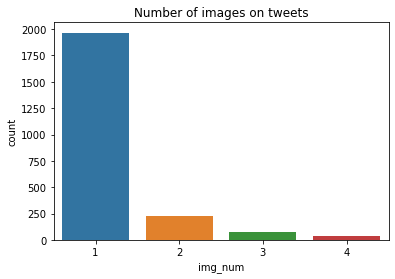

In [78]:
#plotting the value count of the img_num column
pl = sns.countplot(x='img_num',data=twitter_archive_combined,order=['1','2','3','4'])
#setting title
pl.set_title('Number of images on tweets')

Most of the tweets contain one image

In [79]:
#function to plot value counts
def function(x):
    print("The unique values in the column are: {} ".format(x.unique()))
    pl = sns.countplot(x=x)
    pl.set_title("Count of unique values")

The unique values in the column are: ['Twitter for iPhone' 'Twitter Web Client' 'TweetDeck'] 


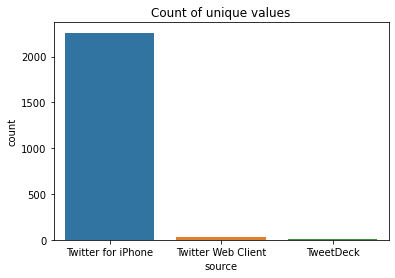

In [80]:
#getting countplot of source column
function(twitter_archive_combined['source'])

Most of the tweets were made using Twitter for iPhone

The unique values in the column are: ['Not classified' 'pupper' 'floofer' 'doggo' 'puppo'] 


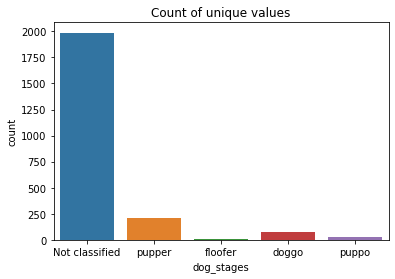

In [81]:
#getting countplot of dog_stages column
function(twitter_archive_combined['dog_stages'])

Most of the dogs were not classified in the tweets

In [82]:
#getting the unique values in twitter_archived_combined table
twitter_archive_combined['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

The majority of the tweets were made using Twitter for iPhones

Text(0.5, 1.0, 'correlation between retweet_count and favorite_count')

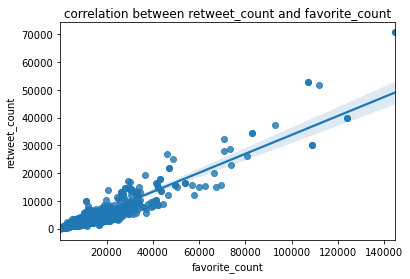

In [83]:
#regression plot to visulaize the correlation between favorite count and retweet count
hl = sns.regplot(x=twitter_archive_combined['favorite_count'],y=twitter_archive_combined['retweet_count'])
hl.set_title('correlation between retweet_count and favorite_count')

There is a positive correlation between retweet_count and favorite_count. How about getting the correlation coefficient?

In [84]:
#getting the correlation coefficient between favorite count and retweet count
np.corrcoef(twitter_archive_combined['favorite_count'],twitter_archive_combined['retweet_count'])[0,1]

0.9341740049227775

The correlation coefficient is 0.93 indicating a strong positive correlation between like count and retweet count

In [85]:
#getting statistical summary of the data
twitter_archive_combined[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2302.000000,2302.000000
mean,2371.337967,8037.643354
std,4462.076751,12215.102153
min,11.000000,66.000000
25%,524.000000,1799.000000
50%,1122.000000,3587.000000
75%,2623.750000,9800.250000
max,70732.000000,144883.000000


The average retweet_count is 2370 and that of favorite count is 8030

Text(0.5, 0, 'retweet_count')

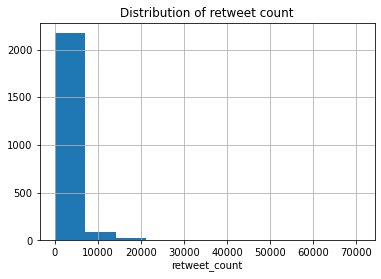

In [86]:
#visualizing the distribution of retweet_count column
ax = twitter_archive_combined['retweet_count'].hist()
ax.set_title('Distribution of retweet count')
ax.set_xlabel('retweet_count')

retweet count appears to be skewed to the right. A box plot is needed to visualize outliers 

Text(0.5, 1.0, 'retweet count boxplot')

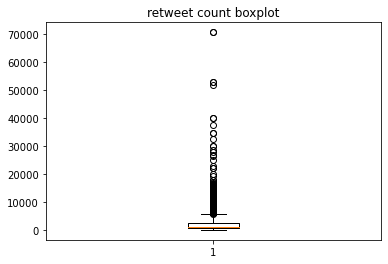

In [87]:
#checking for outliers in retweet count
plt.boxplot(twitter_archive_combined['retweet_count']);
plt.title('retweet count boxplot')

There are outliers for retweet count above 5000

Text(0.5, 0, 'favorite_count')

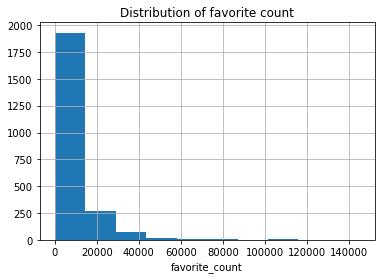

In [88]:
#visualizing the distribution of favorite_count column
pl = twitter_archive_combined['favorite_count'].hist()
pl.set_title('Distribution of favorite count')
pl.set_xlabel('favorite_count')

Text(0.5, 1.0, 'favorite count boxplot')

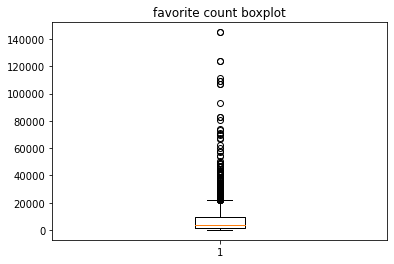

In [89]:
#checking for outliers in like count
plt.boxplot(twitter_archive_combined['favorite_count']);
plt.title('favorite count boxplot')

There are outliers for likes count above 20000

<a id='store'></a>
##  Storing Data

In [90]:
#storing the combined dataframe to twitter_archive_master.csv
twitter_archive_combined.to_csv('twitter_archive_master.csv')